In [1]:
import pandas as pd
import numpy as np

import io
from google.colab import files

In [2]:
uploaded = files.upload()

Saving result_vacancy_hh to result_vacancy_hh


In [3]:
df = pd.read_csv(io.StringIO(uploaded['result_vacancy_hh'].decode('utf-8')))

In [4]:
df.shape

(13890, 9)

In [ ]:
df.head()

In [ ]:
df1 = df.groupby('title').count()

In [ ]:
df1.sort_values(['company'], ascending = False).reset_index().head(10)

In [5]:
# Importing necessary library
import nltk
import os
import nltk.corpus

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
job_keywords1 = set(['data analyst', 'data scientist', 'аналитик данных', 'аналитик'])
job_keywords2 = set(['data analyst', 'data scientist', 'data science', 'machine learning', 'deep learning', 'ML', 'DS', 'analyst',
                     'аналитик данных', 'аналитик'])
job_keywords3 = set(['analyst', 'scientist', 'science', 'machine', 'deep', 'ml', 'ds'])
job_keywords4 = set(['scientist', 'science', 'machine', 'deep', 'ml', 'ds'])

In [7]:
tool_keywords1 = set(['python', 'pytorch', 'sql', 'powerpoint', 'spark', 'java', 'nosql', 'docker', 'salesforce', 'scala', 'r',
                     'c', 'c++', 'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow',
                     'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl',
                     'bigquery', 'unix', 'react', 'django','seaborn', 'github', 'git', 'airflow', 'looker', 'plotly', 'xgboost', 'rstudio', 'shiny',
                     'hadoop', 'nltk','flask', 'rust', 'dask', 'ruby', 'julia', 'tensor', 'nlp', 'cv'])

tool_keywords2 = ['python', 'pytorch', 'sql', 'mxnet', 'mlflow', 'einstein', 'theano', 'pyspark', 'solr', 'mahout', 
 'cassandra', 'aws', 'powerpoint', 'spark', 'pig', 'sas', 'java', 'nosql', 'docker', 'salesforce', 'scala', 'r',
 'c', 'c++', 'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow', 'clojure',
 'caffe', 'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'gcp', 'mongodb', 'mysql', 'oracle', 
 'redshift', 'snowflake', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl', 'bigquery', 'unix', 'react',
 'scikit', 'powerbi', 's3', 'ec2', 'lambda', 'ssrs', 'kubernetes', 'hana', 'spacy', 'tf', 'django', 'sagemaker',
 'seaborn', 'mllib', 'github', 'git', 'elasticsearch', 'splunk', 'airflow', 'looker', 'rapidminer', 'birt', 'pentaho', 
 'jquery', 'nodejs', 'd3', 'plotly', 'bokeh', 'xgboost', 'rstudio', 'shiny', 'dash', 'h20', 'h2o', 'hadoop', 'mapreduce', 
 'hive', 'cognos', 'angular', 'nltk', 'flask', 'node', 'firebase', 'bigtable', 'rust', 'php', 'cntk', 'lightgbm', 
 'kubeflow', 'rpython', 'unixlinux', 'postgressql', 'postgresql', 'postgres', 'hbase', 'dask', 'ruby', 'julia', 'tensor',
# added r packages doesn't seem to impact the result
 'dplyr','ggplot2','esquisse','bioconductor','shiny','lubridate','knitr','mlr','quanteda','dt','rcrawler','caret','rmarkdown',
 'leaflet','janitor','ggvis','plotly','rcharts','rbokeh','broom','stringr','magrittr','slidify','rvest',
 'rmysql','rsqlite','prophet','glmnet','text2vec','snowballc','quantmod','rstan','swirl','datasciencer']

In [8]:
from nltk import pos_tag
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [9]:
# process the job description.
def prepare_job_desc(desc):
    # tokenize description.
    tokens = word_tokenize(desc)
        
    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = [tok for tok, tag in token_tag if tag in include_tags]
    
    # stem words.
    stemmed_tokens = [ps.stem(tok).lower() for tok in filtered_tokens]
    return set(stemmed_tokens)

In [10]:
from collections import Counter
import string

import math

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# опредленеи топ вакансия в зависисомти от компании

In [ ]:
df_company = df.groupby('company')['title'].count().reset_index()

In [ ]:
df_company.sort_values(['title'], ascending = False).reset_index().head(20)

In [ ]:
# предварительный анализ показал, что некоторые компании представлены под несколькими именами
# поэтому объединим по названию

In [ ]:
df['company_word_set'] = df['company'].map(prepare_job_desc)

In [ ]:
company_list = []
i=0
for i in range(len(df)):
  company_words = df.loc[i, 'company_word_set']
  #company_words  = (ex.intersection(tool_keywords1))
  company_list += list(company_words)

df_company_words = pd.DataFrame(data={'cnt': company_list})

In [ ]:
df_company_count = df_company_words.value_counts().reset_index()
df_company_count.rename(columns={ df_company_count.columns[1]: 'number',
                                  df_company_count.columns[0]: 'company'}, inplace = True)
df_company_count.head(50)

In [11]:
# create two set of top company - top5 and top10
job_company_top5 = set(['сбер', 'ozon', 'яндекс', 'vk', 'мтс'])
job_company_top10 = set(['сбер', 'ozon', 'яндекс', 'vk', 'мтс', 'technolog', 'иннотех', 'касперского', 'тинькофф', 'втб'])

In [ ]:
# create world set for description, title and company

In [12]:
df['description_word_set'] = df['description'].map(prepare_job_desc)

In [13]:
df['title_word_set'] = df['title'].map(prepare_job_desc)
df['company_word_set'] = df['company'].map(prepare_job_desc)

In [14]:
# add columns 0/1 with top5 and top10 company

df['company_top5'] = 0
df['company_top10'] = 0
i=0
for i in range(len(df)):
  ex = df.loc[i, 'company_word_set']
  company_words_top5  = (ex.intersection(job_company_top5))
  company_words_top10  = (ex.intersection(job_company_top10))
  if len(company_words_top5)>0:
    df.loc[i, 'company_top5'] = 1
  if len(company_words_top10)>0:
    df.loc[i, 'company_top10'] = 1


In [ ]:
df.head()

In [15]:
df['title_ds'] = 0
i=0
for i in range(len(df)):
  ex = df.loc[i, 'title_word_set']
  title_words  = (ex.intersection(job_keywords4))
  
  if len(title_words)>0:
    df.loc[i, 'title_ds'] = 1


In [16]:
df_work = df.loc[df.title_ds == 1].reset_index()
df_work.shape

(672, 16)

In [ ]:
# create colunm with key words from description - take only English words and drop punctuation

In [ ]:
import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
def key_words_description(description):
  sent = " ".join(w for w in nltk.wordpunct_tokenize(description) if w.lower() in words or not w.isalpha())
  sent_no_num = ''.join([i for i in sent if not i.isdigit()])
  no_punct_sent = sent_no_num.translate(str.maketrans('', '', string.punctuation))
  tokens_no_punct = word_tokenize(no_punct_sent)
  stemmed_tokens = [ps.stem(tok).lower() for tok in tokens_no_punct]
  return set(stemmed_tokens)


In [ ]:
df['key_words_description'] = df['description'].map(key_words_description)

In [ ]:
df_work = df.loc[df.title_ds == 1].reset_index()


In [ ]:
skill_list = []
i=0
for i in range(len(df_work)):
  slill_words = df_work.loc[i, 'key_words_description']
  skill_list += list(slill_words)

df_skill_words = pd.DataFrame(data={'cnt': skill_list})

In [ ]:
df_skill_count = df_skill_words.value_counts().reset_index()
df_skill_count.rename(columns={df_skill_count.columns[1]: 'number',
                               df_skill_count.columns[0]: 'skill'}, inplace = True)
df_skill_count.head(50)

In [ ]:
df_skill_count.shape

(662, 2)

In [17]:
# create the set of top skill/tool
tool_keywords0 = set(['python', 'r', 'vision', 'git', 'docker', 'spark', 'excel', 'scala', 'oracl', 'flask', 'tableau', 'stack'])

tool_keywords1 = set(['python', 'pytorch', 'sql', 'powerpoint', 'spark', 'java', 'nosql', 'docker', 'salesforce', 'scala', 'r',
                     'c', 'c++', 'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow',
                     'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl',
                     'bigquery', 'unix', 'react', 'django','seaborn', 'github', 'git', 'airflow', 'looker', 'plotly', 'xgboost', 'rstudio', 'shiny',
                     'hadoop', 'nltk','flask', 'rust', 'dask', 'ruby', 'julia', 'tensor', 'nlp', 'cv'])

tool_keywords2 = ['python', 'pytorch', 'sql', 'mxnet', 'mlflow', 'einstein', 'theano', 'pyspark', 'solr', 'mahout', 
 'cassandra', 'aws', 'powerpoint', 'spark', 'pig', 'sas', 'java', 'nosql', 'docker', 'salesforce', 'scala', 'r',
 'c', 'c++', 'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow', 'clojure',
 'caffe', 'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'gcp', 'mongodb', 'mysql', 'oracle', 
 'redshift', 'snowflake', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl', 'bigquery', 'unix', 'react',
 'scikit', 'powerbi', 's3', 'ec2', 'lambda', 'ssrs', 'kubernetes', 'hana', 'spacy', 'tf', 'django', 'sagemaker',
 'seaborn', 'mllib', 'github', 'git', 'elasticsearch', 'splunk', 'airflow', 'looker', 'rapidminer', 'birt', 'pentaho', 
 'jquery', 'nodejs', 'd3', 'plotly', 'bokeh', 'xgboost', 'rstudio', 'shiny', 'dash', 'h20', 'h2o', 'hadoop', 'mapreduce', 
 'hive', 'cognos', 'angular', 'nltk', 'flask', 'node', 'firebase', 'bigtable', 'rust', 'php', 'cntk', 'lightgbm', 
 'kubeflow', 'rpython', 'unixlinux', 'postgressql', 'postgresql', 'postgres', 'hbase', 'dask', 'ruby', 'julia', 'tensor',
# added r packages doesn't seem to impact the result
 'dplyr','ggplot2','esquisse','bioconductor','shiny','lubridate','knitr','mlr','quanteda','dt','rcrawler','caret','rmarkdown',
 'leaflet','janitor','ggvis','plotly','rcharts','rbokeh','broom','stringr','magrittr','slidify','rvest',
 'rmysql','rsqlite','prophet','glmnet','text2vec','snowballc','quantmod','rstan','swirl','datasciencer']


In [ ]:
# составляем лист с частотой втсречаемых слов из набора умений/навыков

In [ ]:
# первое для всех вакансий из дс 

In [ ]:
# первый набор скилов

In [44]:
tool_list = []
i=0
for i in range(len(df_work)):
  ex = df_work.loc[i, 'description_word_set']
  tool_words  = (ex.intersection(tool_keywords0))
  tool_list += list(tool_words)

df_work_tool = pd.DataFrame(data={'cnt': tool_list})

In [45]:
num = (df_work_tool['cnt'].value_counts())/len(df_work)
df_fig = pd.DataFrame(data=num).reset_index()
df_fig = df_fig.rename(columns={"index": "tools", "cnt": "value"})

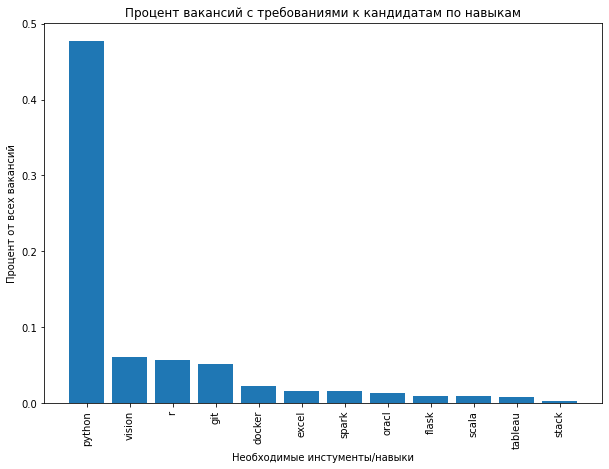

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.xticks(rotation=90)
plt.bar(df_fig['tools'], df_fig['value'])

plt.title('Процент вакансий с требованиями к кандидатам по навыкам')
plt.xlabel('Необходимые инстументы/навыки')
plt.ylabel('Процент от всех вакансий')

plt.savefig('sav_all_tool_0.png')

In [21]:
# второй набор скилов

In [48]:
tool_list = []
i=0
for i in range(len(df_work)):
  ex = df_work.loc[i, 'description_word_set']
  tool_words  = (ex.intersection(tool_keywords1))
  tool_list += list(tool_words)

df_work_tool = pd.DataFrame(data={'cnt': tool_list})

In [49]:
num = (df_work_tool['cnt'].value_counts())/len(df_work)
df_fig = pd.DataFrame(data=num).reset_index()
df_fig = df_fig.rename(columns={"index": "tools", "cnt": "value"})

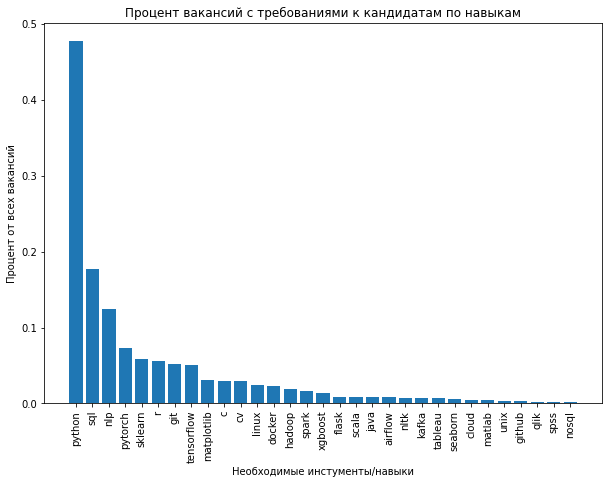

In [50]:
plt.figure(figsize = (10,7))
plt.xticks(rotation=90)
plt.bar(df_fig['tools'], df_fig['value'])

plt.title('Процент вакансий с требованиями к кандидатам по навыкам')
plt.xlabel('Необходимые инстументы/навыки')
plt.ylabel('Процент от всех вакансий')

plt.savefig('sav_all_tool_1.png')

In [24]:
# третий набор скилов

In [51]:
tool_list = []
i=0
for i in range(len(df_work)):
  ex = df_work.loc[i, 'description_word_set']
  tool_words  = (ex.intersection(tool_keywords2))
  tool_list += list(tool_words)

df_work_tool = pd.DataFrame(data={'cnt': tool_list})

In [52]:
num = (df_work_tool['cnt'].value_counts())/len(df_work)
df_fig = pd.DataFrame(data=num).reset_index()
df_fig = df_fig.rename(columns={"index": "tools", "cnt": "value"})

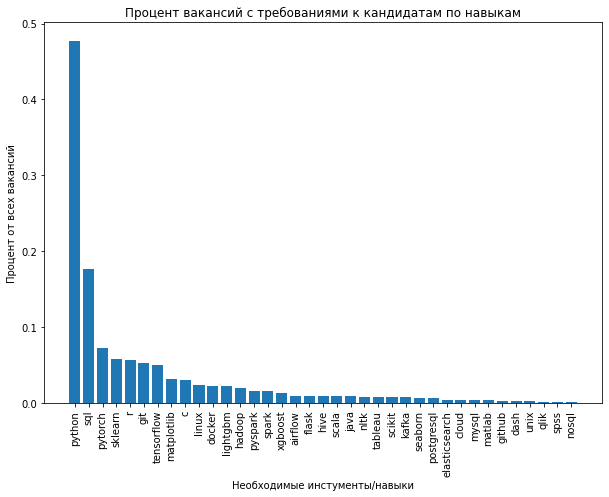

In [53]:
plt.figure(figsize = (10,7))
plt.xticks(rotation=90)
plt.bar(df_fig['tools'], df_fig['value'])

plt.title('Процент вакансий с требованиями к кандидатам по навыкам')
plt.xlabel('Необходимые инстументы/навыки')
plt.ylabel('Процент от всех вакансий')

plt.savefig('sav_all_tool_2.png')

In [ ]:
# анализ в зависимости от уровня компании: три набора, все компании, топ 5 и топ 10.

In [ ]:
# определеие кол-во вакансий

In [54]:
df_work_top5 = df.loc[df.company_top5 == 1].reset_index()

In [55]:
df_work_top5.shape

(2101, 16)

In [56]:
df_work = df.loc[df.title_ds == 1].reset_index()
df_work_ds_top5 = df_work.loc[df_work.company_top5 == 1].reset_index()

In [57]:
df_work_ds_top5.shape

(165, 17)

In [58]:
df_work_top10 = df.loc[df.company_top10 == 1].reset_index()

In [59]:
df_work_top10.shape

(2804, 16)

In [60]:
df_work = df.loc[df.title_ds == 1].reset_index()
df_work_ds_top10 = df_work.loc[df_work.company_top10 == 1].reset_index()

In [61]:
df_work_ds_top10.shape

(211, 17)

In [ ]:
# проводим анализ для топ 5 компания и остальных вакансий

In [65]:
df_work = df.loc[df.title_ds == 1].reset_index()
df_work_ds_top5 = df_work.loc[df_work.company_top5 == 1].reset_index()
df_work_ds_out5 = df_work.loc[df_work.company_top5 == 0].reset_index()

In [66]:
# top 5 companies

In [106]:
tool_list_top5 = []
i=0
for i in range(len(df_work_ds_top5)):
  ex = df_work_ds_top5.loc[i, 'description_word_set']
  tool_words  = (ex.intersection(tool_keywords2))
  tool_list_top5 += list(tool_words)

df_work_tool_top5 = pd.DataFrame(data={'cnt': tool_list_top5})

In [ ]:
num = (df_work_tool_top5['cnt'].value_counts())/len(df_work_ds_top5)
df_fig = pd.DataFrame(data=num).reset_index()
df_fig = df_fig.rename(columns={"index": "tools", "cnt": "value"})


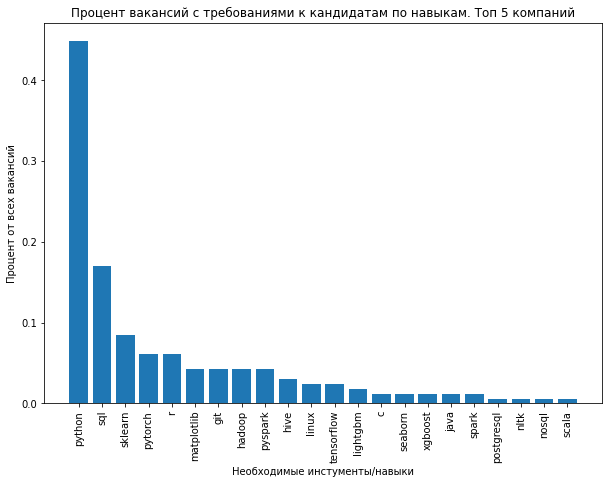

In [77]:
plt.figure(figsize = (10,7))
plt.xticks(rotation=90)
plt.bar(df_fig['tools'], df_fig['value'])

plt.title('Процент вакансий с требованиями к кандидатам по навыкам. Топ 5 компаний')
plt.xlabel('Необходимые инстументы/навыки')
plt.ylabel('Процент от всех вакансий')

plt.savefig('sav_all_tool_top5.png')

In [ ]:
# NOT top 5 companies

In [108]:
tool_list_out5 = []
i=0
for i in range(len(df_work_ds_out5)):
  ex = df_work_ds_out5.loc[i, 'description_word_set']
  tool_words  = (ex.intersection(tool_keywords2))
  tool_list_out5 += list(tool_words)

df_work_tool_out5 = pd.DataFrame(data={'cnt': tool_list_out5})

In [109]:
num = (df_work_tool_out5['cnt'].value_counts())/len(df_work_ds_out5)
df_fig = pd.DataFrame(data=num).reset_index()
df_fig = df_fig.rename(columns={"index": "tools", "cnt": "value"})


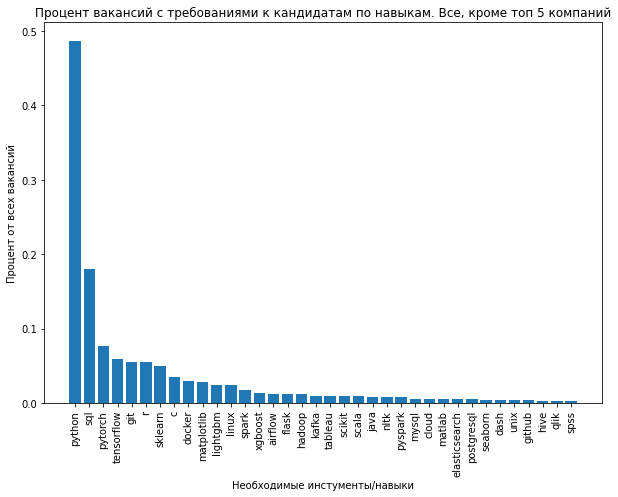

In [100]:
plt.figure(figsize = (10,7))
plt.xticks(rotation=90)
plt.bar(df_fig['tools'], df_fig['value'])

plt.title('Процент вакансий с требованиями к кандидатам по навыкам. Все, кроме топ 5 компаний')
plt.xlabel('Необходимые инстументы/навыки')
plt.ylabel('Процент от всех вакансий')

plt.savefig('sav_all_tool_out5.png')

In [87]:
from  scipy.stats import chi2_contingency
import numpy as np
kf_data = np.array([[13890,2101], [672, 165]])
kf = chi2_contingency(kf_data)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

chisq-statistic=28.9434, p-value=0.0000, df=1 expected_frep=[[13837.70751129  2153.29248871]
 [  724.29248871   112.70751129]]
